#### <i> Optimizing Solar Energy Production in the USA Time-Series Analysis Using AI for Smart Energy Management </i>
#### <i> Import Library Files </i>

In [41]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


#### <i>  Load the datset  And Dataset Overview </i>

In [42]:
df_1 = pd.read_csv("solar.csv")
df_1

,date,voltage,current,power
0,2024-11-01 15:58:50.881243,0.240948,0.004724,0.001138
1,2024-11-01 15:58:51.881621,0.231279,0.004535,0.001049
2,2024-11-01 15:58:52.883231,0.237725,0.004661,0.001108
3,2024-11-01 15:58:53.884848,0.235308,0.004614,0.001086
4,2024-11-01 15:58:54.886865,0.233697,0.004582,0.001071
...,...,...,...,...
2672894,2024-12-02 14:29:27.670662,0.479478,0.009402,0.004508
2672895,2024-12-02 14:29:28.672138,0.479478,0.009402,0.004508
2672896,2024-12-02 14:29:29.672371,0.485924,0.009528,0.004630
2672897,2024-12-02 14:29:30.673952,0.485118,0.009512,0.004614


In [43]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672899 entries, 0 to 2672898
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   voltage  float64
 2   current  float64
 3   power    float64
dtypes: float64(3), object(1)
memory usage: 81.6+ MB


In [44]:
df_1.describe()

,voltage,current,power
count,2.672899e+06,2.672899e+06,2.672899e+06
mean,3.251026e-01,6.374561e-03,1.075509e-02
std,6.654459e-01,1.304796e-02,3.605611e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.094759e-02,4.107369e-04,8.603948e-06
50%,2.739300e-02,5.371176e-04,1.471326e-05
75%,3.489082e-01,6.841338e-03,2.386999e-03
max,3.300000e+00,6.470588e-02,2.135294e-01


In [45]:
df_2 = pd.read_csv("weather-data-clean.csv")
df_2

,datetime,humidity,cloudcover,visibility,solarradiation
0,2024-11-01 00:00:00,93.05,51,24.1,0
1,2024-11-01 01:00:00,93.05,54,24.1,0
2,2024-11-01 02:00:00,89.45,55,24.1,0
3,2024-11-01 03:00:00,89.45,58,24.1,0
4,2024-11-01 04:00:00,89.45,66,24.1,0
...,...,...,...,...,...
644,2024-11-27 19:00:00,88.37,6,16.2,13
645,2024-11-27 20:00:00,92.27,8,16.2,0
646,2024-11-27 21:00:00,92.23,9,16.2,0
647,2024-11-27 22:00:00,92.23,11,16.2,0


In [46]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        649 non-null    object 
 1   humidity        649 non-null    float64
 2   cloudcover      649 non-null    int64  
 3   visibility      649 non-null    float64
 4   solarradiation  649 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 25.5+ KB


In [47]:
df_2.describe()

,humidity,cloudcover,visibility,solarradiation
count,649.000000,649.000000,649.000000,649.000000
mean,75.190832,57.195686,14.685824,66.791988
std,15.239069,32.302012,4.248564,113.380293
min,31.210000,0.000000,0.500000,0.000000
25%,65.860000,31.000000,16.200000,0.000000
50%,76.910000,59.000000,16.200000,3.000000
75%,85.970000,88.000000,16.300000,81.000000
max,100.000000,100.000000,24.100000,471.000000


#### <i> Data Visulizations And Analysis </i>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.dates import DateFormatter

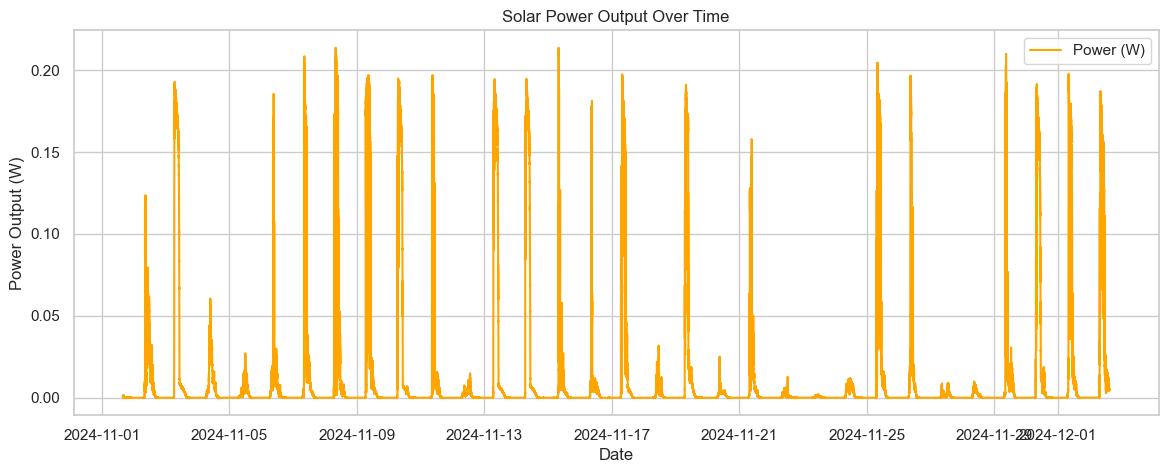

In [49]:


# Optional: set Seaborn style
sns.set(style="whitegrid", palette="Set2")

# Convert dates to datetime
df_1['date'] = pd.to_datetime(df_1['date'])
df_2['datetime'] = pd.to_datetime(df_2['datetime'])

# Merge using nearest timestamp
df = pd.merge_asof(df_1.sort_values('date'),
                   df_2.sort_values('datetime'),
                   left_on='date', right_on='datetime')

df.drop(columns='datetime', inplace=True)
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month_name()
df['weekday'] = df['date'].dt.day_name()

# -----------------------
# 🔍 Basic Time-Series Line Plots
# -----------------------
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['power'], label='Power (W)', color='orange')
plt.xlabel('Date')
plt.ylabel('Power Output (W)')
plt.title('Solar Power Output Over Time')
plt.legend()
plt.show()

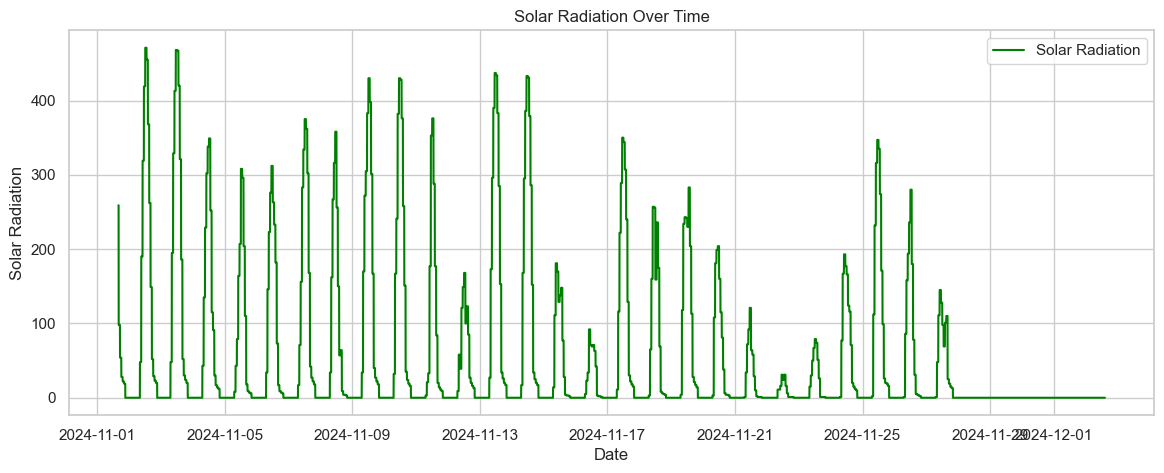

In [50]:
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['solarradiation'], label='Solar Radiation', color='green')
plt.xlabel('Date')
plt.ylabel('Solar Radiation')
plt.title('Solar Radiation Over Time')
plt.legend()
plt.show()

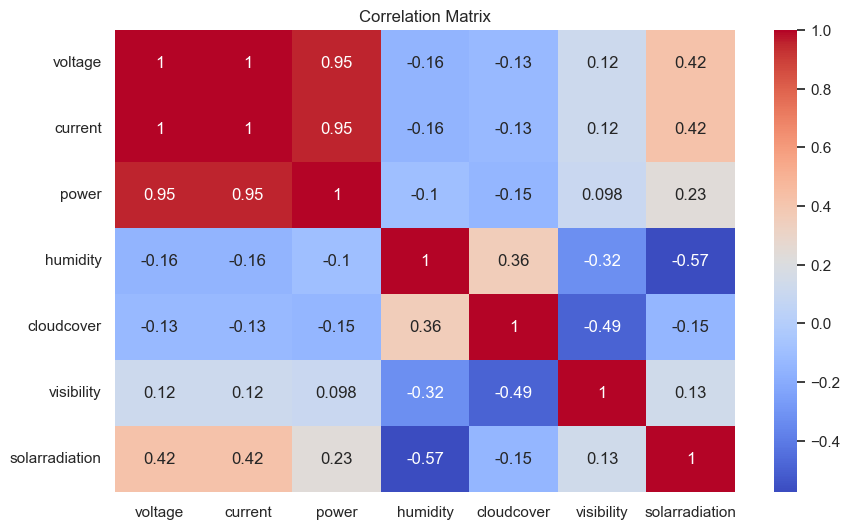

In [51]:
# 🔁 Correlation Heatmap
# -----------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df[['voltage', 'current', 'power', 'humidity', 'cloudcover', 'visibility', 'solarradiation']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


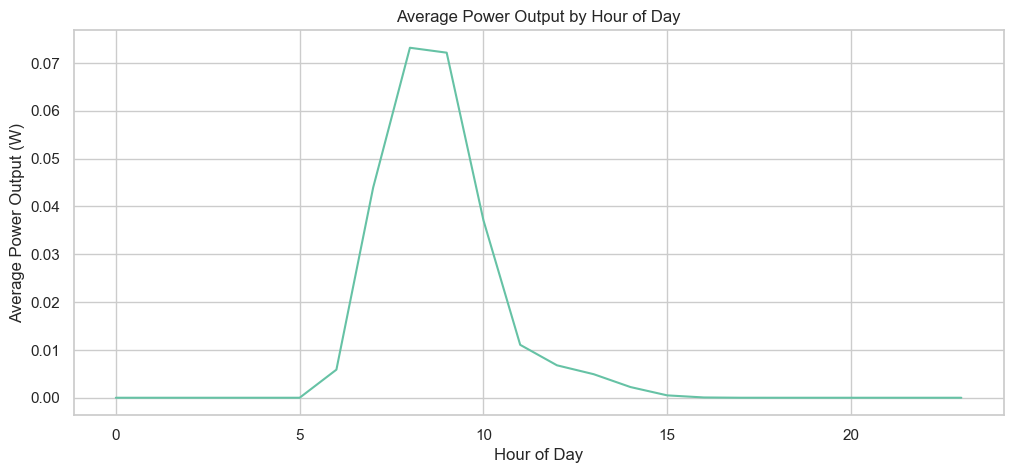

In [52]:
# 🕒 Hourly/Daily Pattern Analysis (if applicable)
# -----------------------
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.date

# Average power by hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.groupby('hour')['power'].mean().reset_index(), x='hour', y='power')
plt.title('Average Power Output by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power Output (W)')
plt.show()


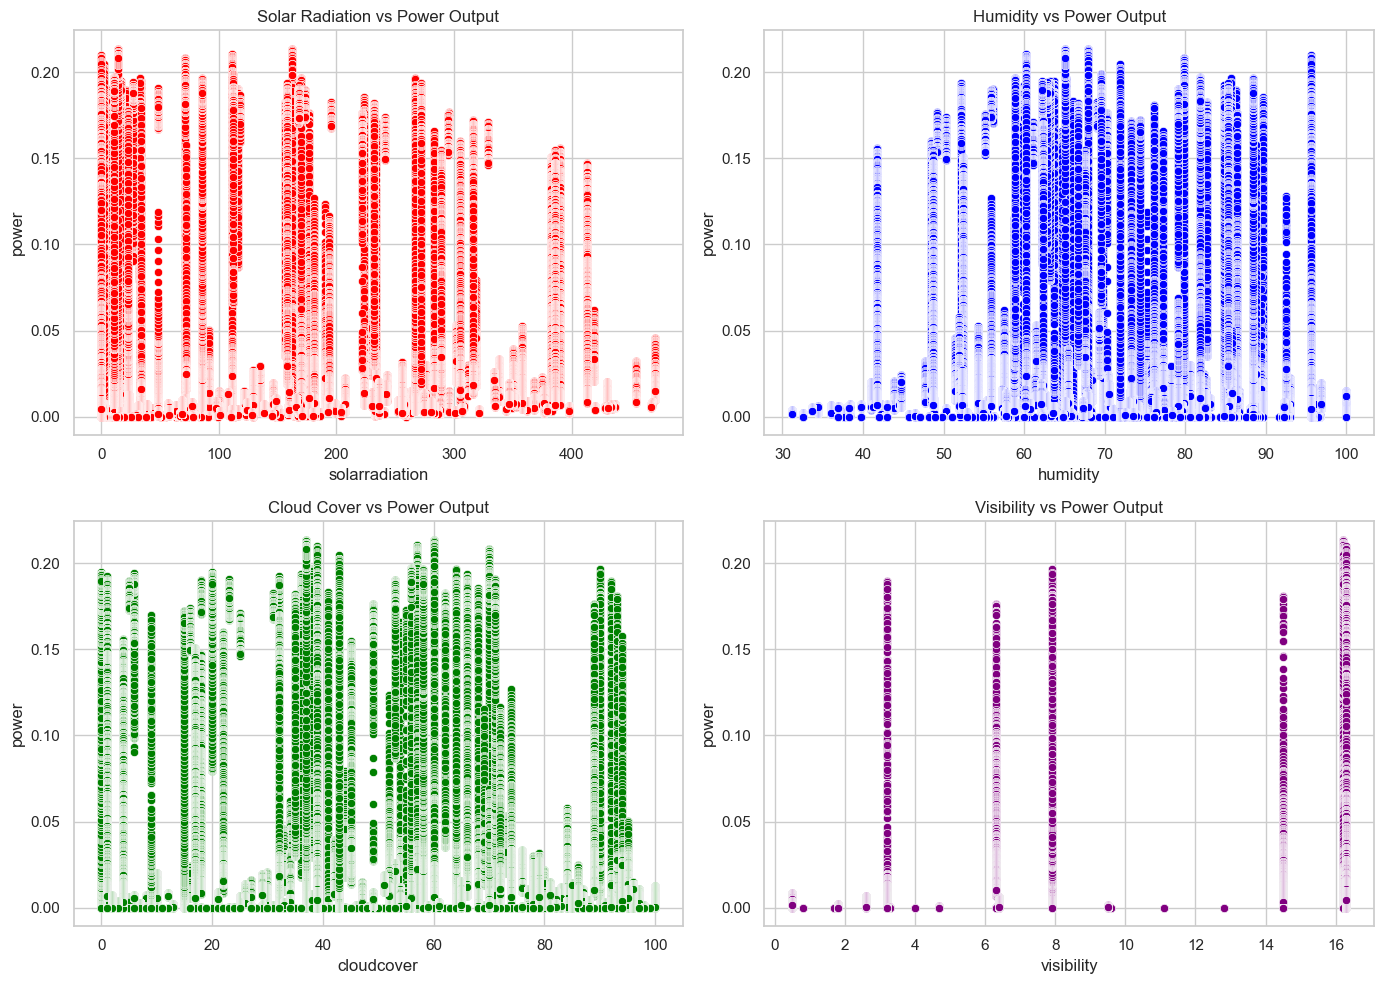

In [53]:
# 📉 Scatter Plots: Weather Factors vs Power
# -----------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(data=df, x='solarradiation', y='power', ax=axs[0, 0], color='red')
axs[0, 0].set_title('Solar Radiation vs Power Output')

sns.scatterplot(data=df, x='humidity', y='power', ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Humidity vs Power Output')

sns.scatterplot(data=df, x='cloudcover', y='power', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Cloud Cover vs Power Output')

sns.scatterplot(data=df, x='visibility', y='power', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Visibility vs Power Output')

plt.tight_layout()
plt.show()

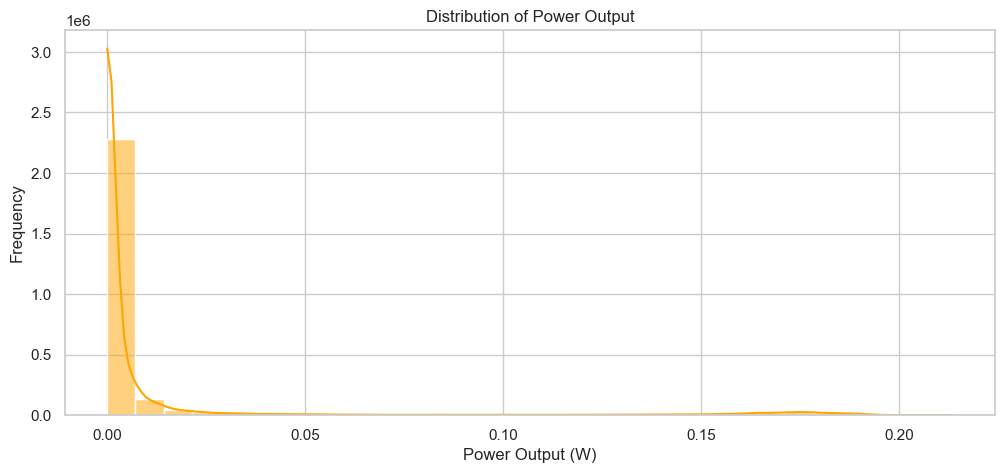

In [54]:
# 📊 Distribution Plots
# -----------------------
plt.figure(figsize=(12, 5))
sns.histplot(df['power'], kde=True, bins=30, color='orange')
plt.title('Distribution of Power Output')
plt.xlabel('Power Output (W)')
plt.ylabel('Frequency')
plt.show()

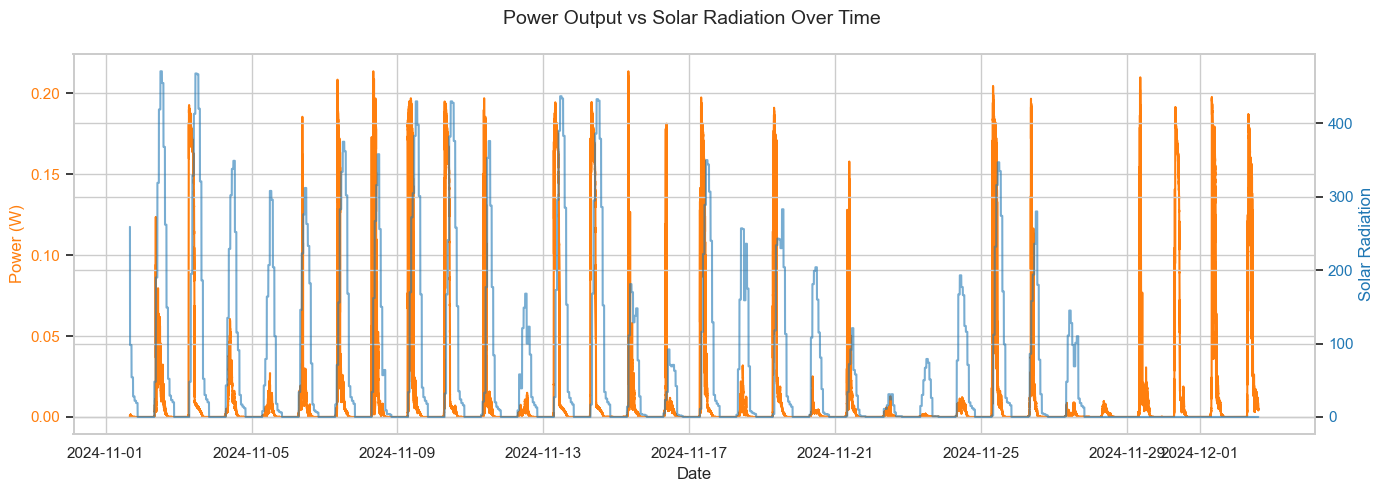

In [55]:
#  📉 Dual-axis plot: Power and Solar Radiation
# -------------------------------
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.set_xlabel('Date')
ax1.set_ylabel('Power (W)', color='tab:orange')
ax1.plot(df['date'], df['power'], color='tab:orange', label='Power')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Solar Radiation', color='tab:blue')
ax2.plot(df['date'], df['solarradiation'], color='tab:blue', alpha=0.6, label='Solar Radiation')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Power Output vs Solar Radiation Over Time', fontsize=14)
fig.tight_layout()
plt.show()

In [56]:
# 4. 🌞 Sunburst: Power Distribution by Month > Weekday > Hour
# -------------------------------
df_sunburst = df.copy()
df_sunburst['hour'] = df_sunburst['date'].dt.hour
df_sunburst['power_bucket'] = pd.cut(df_sunburst['power'], bins=5)

fig = px.sunburst(df_sunburst,
                  path=['month', 'weekday', 'hour'],
                  values='power',
                  color='power',
                  color_continuous_scale='YlOrRd',
                  title='Sunburst of Power Output by Month > Weekday > Hour')
fig.show()

#### <i> Data Preprocessing </i>

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# 🧹 Preprocessing Again
# ======================

# Date to datetime
df_1['date'] = pd.to_datetime(df_1['date'])
df_2['datetime'] = pd.to_datetime(df_2['datetime'])

# Merge on time
df = pd.merge_asof(df_1.sort_values('date'),
                   df_2.sort_values('datetime'),
                   left_on='date', right_on='datetime')

# Drop exact time column to prevent leakage
df.drop(columns=['datetime'], inplace=True)

# Feature engineering
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Define target class — top 30% power is "high"
threshold = df['power'].quantile(0.70)
df['power_class'] = (df['power'] >= threshold).astype(int)

# ❌ DROP columns that may cause leakage
df_model = df.drop(columns=['date', 'power', 'voltage', 'current'])  # drop leakage sources

# Handle missing
df_model.dropna(inplace=True)

# Define features and label
X = df_model.drop(columns='power_class')
y = df_model['power_class']

# ================
# ⚖️ Handle Imbalance
# ================

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)



#### <i> Modeling </i>
#### <i> Logistic Regression </i>

Logistic Regression Accuracy: 0.8402708818093002
              precision    recall  f1-score   support

           0       0.80      0.91      0.85    374112
           1       0.89      0.77      0.83    374111

    accuracy                           0.84    748223
   macro avg       0.85      0.84      0.84    748223
weighted avg       0.85      0.84      0.84    748223



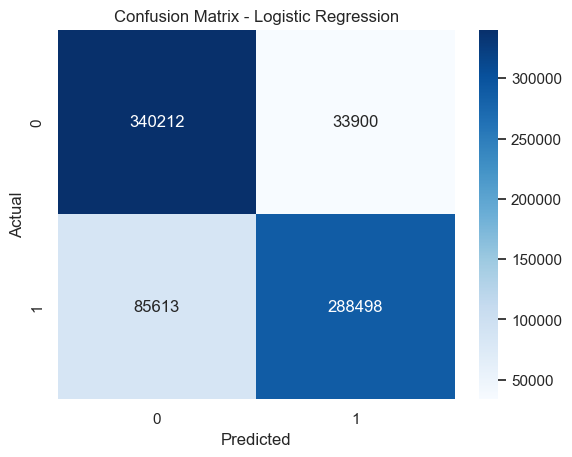

In [58]:

# =====================
# 🔁 Logistic Regression
# =====================

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Eval
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### <i> Random Forest Classifier </i>

Random Forest Accuracy: 0.9726204620814918
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    374112
           1       0.96      0.98      0.97    374111

    accuracy                           0.97    748223
   macro avg       0.97      0.97      0.97    748223
weighted avg       0.97      0.97      0.97    748223



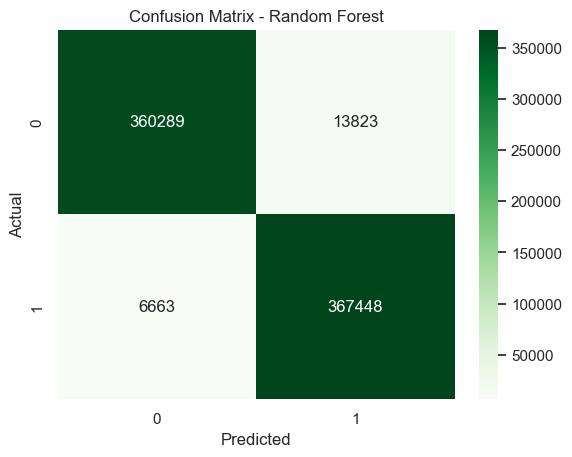

In [59]:
from sklearn.ensemble import RandomForestClassifier

# =========================
# 🌲 Random Forest Training
# =========================

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### <i> XGBClassifier </i>

XGBoost Accuracy: 0.9726324905810166
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    374112
           1       0.96      0.98      0.97    374111

    accuracy                           0.97    748223
   macro avg       0.97      0.97      0.97    748223
weighted avg       0.97      0.97      0.97    748223



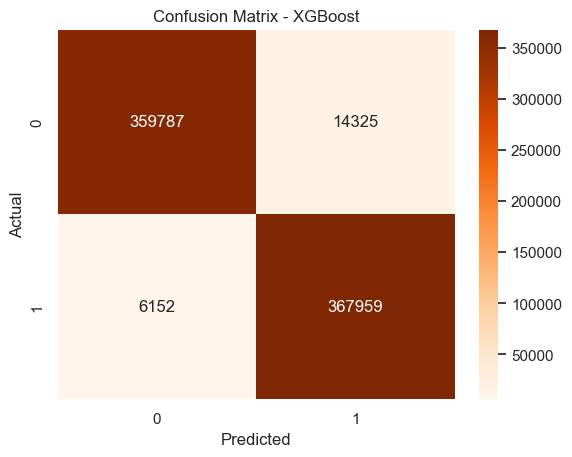

In [60]:
from xgboost import XGBClassifier

# ==========================
# 🚀 XGBoost Model Training
# ==========================

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### <i> Comparison Of All Models </i>

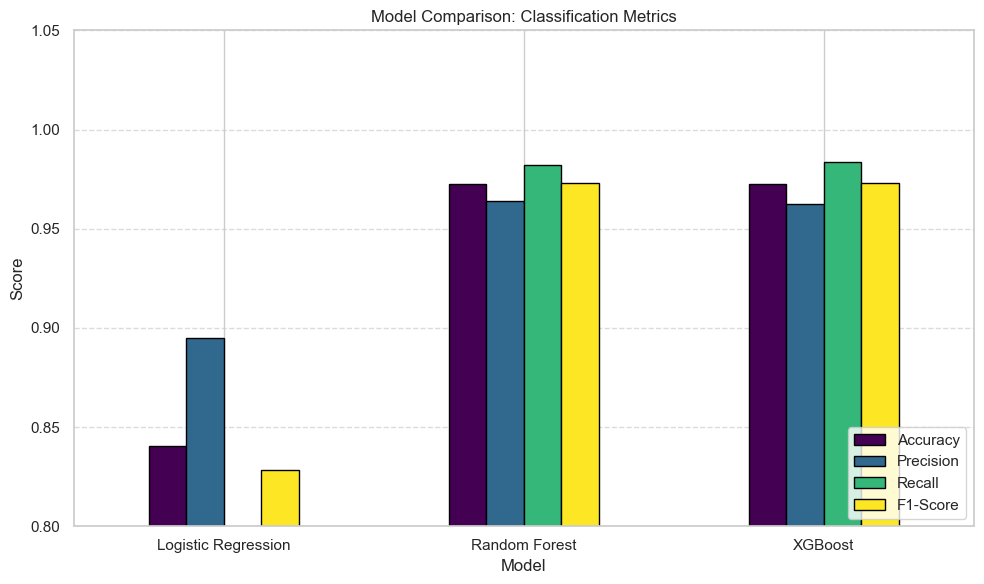

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ===========
# 📊 Metrics
# ===========

models = {
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Store results
results = []

for name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# ================================
# 📉 Bar Plot for Model Comparison
# ================================

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', figsize=(10, 6), rot=0, colormap='viridis', edgecolor='black'
)

plt.title('Model Comparison: Classification Metrics')
plt.ylabel('Score')
plt.ylim(0.8, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
